In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
import warnings
warnings.filterwarnings('ignore')

In [4]:
#!ls

In [5]:
df=pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
Unnamed: 0                  425 non-null int64
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [7]:
df.head (5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [8]:
dupes = df.duplicated()

In [9]:
sum(dupes)

0

In [10]:
df.isnull().values.any()   # Any of the values in the dataframe is a missing value

False

In [11]:
for column in df.columns[2:10]:
    print(column)
    print(df[column].unique())
    print('-------------')

Countries
['Country_01' 'Country_02' 'Country_03']
-------------
Local
['Local_01' 'Local_02' 'Local_03' 'Local_04' 'Local_05' 'Local_06'
 'Local_07' 'Local_08' 'Local_10' 'Local_09' 'Local_11' 'Local_12']
-------------
Industry Sector
['Mining' 'Metals' 'Others']
-------------
Accident Level
['I' 'IV' 'III' 'II' 'V']
-------------
Potential Accident Level
['IV' 'III' 'I' 'II' 'V' 'VI']
-------------
Genre
['Male' 'Female']
-------------
Employee or Third Party
['Third Party' 'Employee' 'Third Party (Remote)']
-------------
Critical Risk
['Pressed' 'Pressurized Systems' 'Manual Tools' 'Others'
 'Fall prevention (same level)' 'Chemical substances' 'Liquid Metal'
 'Electrical installation' 'Confined space'
 'Pressurized Systems / Chemical Substances'
 'Blocking and isolation of energies' 'Suspended Loads' 'Poll' 'Cut'
 'Fall' 'Bees' 'Fall prevention' '\nNot applicable' 'Traffic' 'Projection'
 'Venomous Animals' 'Plates' 'Projection/Burning' 'remains of choco'
 'Vehicles and Mobile Equipm

In [12]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...


In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x : x.year)
df['Month'] = df['Date'].apply(lambda x : x.month)
df['Day'] = df['Date'].apply(lambda x : x.day)
df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
df['MonthName'] = df['Date'].apply(lambda x : x.month_name())
df.head(2)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,WeekofYear,Weekday,MonthName
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,53,Friday,January
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,53,Saturday,January


In [14]:
def seasonofyear(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

df['Season'] = df['Month'].apply(seasonofyear)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
Date                        425 non-null datetime64[ns]
Country                     425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Gender                      425 non-null object
Employee type               425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
Year                        425 non-null int64
Month                       425 non-null int64
Day                         425 non-null int64
WeekofYear                  425 non-null int64
Weekday                     425 non-null object
MonthName                   425 non-null object
Season                      425 non-null object
dtypes: datetime64[ns](1), int64(4), object(12)
memory usage: 56.6+ KB


In [16]:
df_col=list(['Country', 'Local', 'Industry Sector', 'Accident Level', 'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk', 'Year', 'Month', 'Day', 'WeekofYear',  'Weekday', 'MonthName', 'Season'])


In [17]:
df_col

['Country',
 'Local',
 'Industry Sector',
 'Accident Level',
 'Potential Accident Level',
 'Gender',
 'Employee type',
 'Critical Risk',
 'Year',
 'Month',
 'Day',
 'WeekofYear',
 'Weekday',
 'MonthName',
 'Season']

In [18]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

In [19]:
for i in range(len(df_col)):
  df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]])

In [20]:
df.tail()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,WeekofYear,Weekday,MonthName,Season
420,2017-07-04,0,3,1,0,2,1,1,16,"Being approximately 5:00 a.m. approximately, w...",1,6,3,26,5,5,3
421,2017-07-04,0,2,1,0,1,0,0,16,The collaborator moved from the infrastructure...,1,6,3,26,5,5,3
422,2017-07-05,1,8,0,0,1,1,0,31,During the environmental monitoring activity i...,1,6,4,26,6,5,3
423,2017-07-06,1,4,0,0,1,1,0,6,The Employee performed the activity of strippi...,1,6,5,26,4,5,3
424,2017-07-09,0,3,1,0,1,0,1,11,"At 10:00 a.m., when the assistant cleaned the ...",1,6,8,26,3,5,3


In [21]:
distplot_df = df.drop(labels=['Date','Description'], axis=1)

In [22]:
distplot_df

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Year,Month,Day,WeekofYear,Weekday,MonthName,Season
0,0,0,1,0,3,1,1,20,0,0,0,52,0,4,2
1,1,1,1,0,3,1,0,21,0,0,1,52,2,4,2
2,0,2,1,0,2,1,2,15,0,0,5,0,6,4,2
3,0,3,1,0,0,1,1,16,0,0,7,0,0,4,2
4,0,3,1,3,3,1,1,16,0,0,9,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,3,1,0,2,1,1,16,1,6,3,26,5,5,3
421,0,2,1,0,1,0,0,16,1,6,3,26,5,5,3
422,1,8,0,0,1,1,0,31,1,6,4,26,6,5,3
423,1,4,0,0,1,1,0,6,1,6,5,26,4,5,3


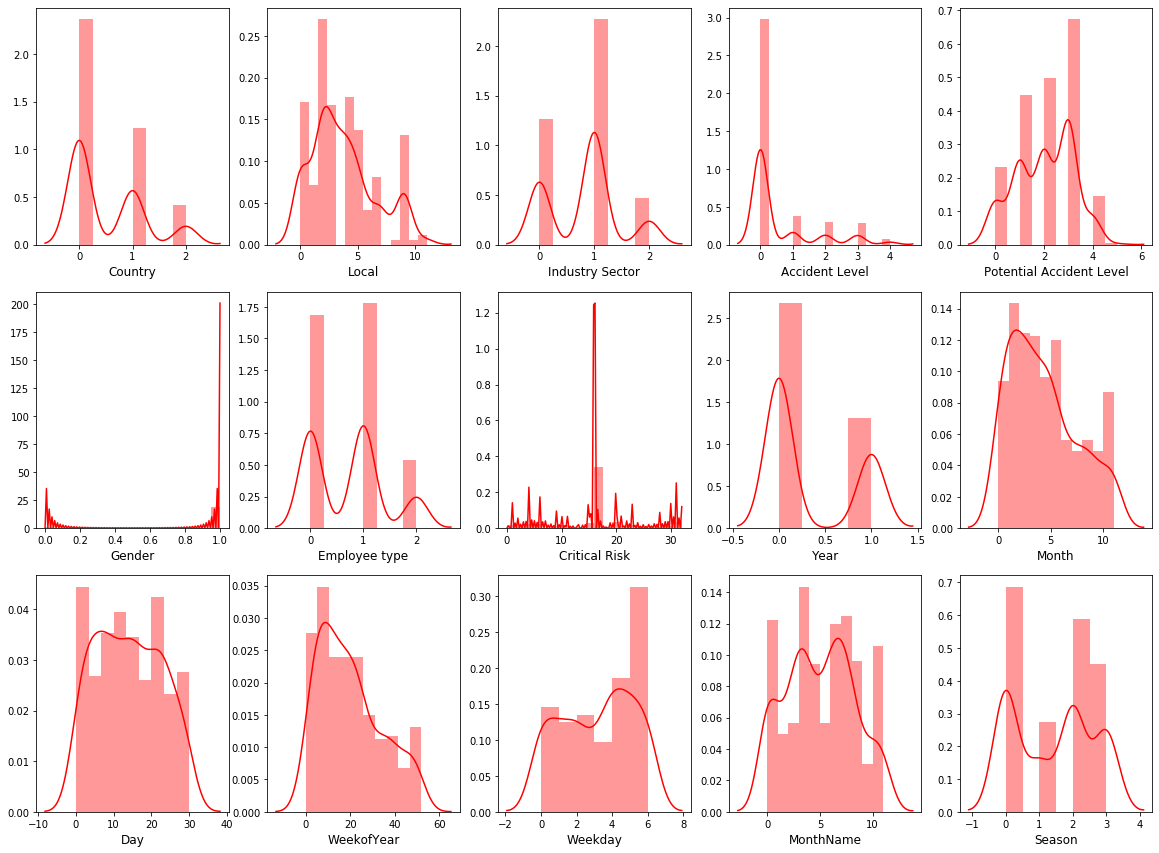

In [23]:
fig = plt.figure(figsize=(20,20)) #Plot distribution for all columns
subCnt = 1
for i in distplot_df.columns:
    fig.add_subplot(4, 5, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.distplot(distplot_df[i], color='red')
    subCnt = subCnt + 1
plt.show()

In [24]:
#sns.pairplot(distplot_df)

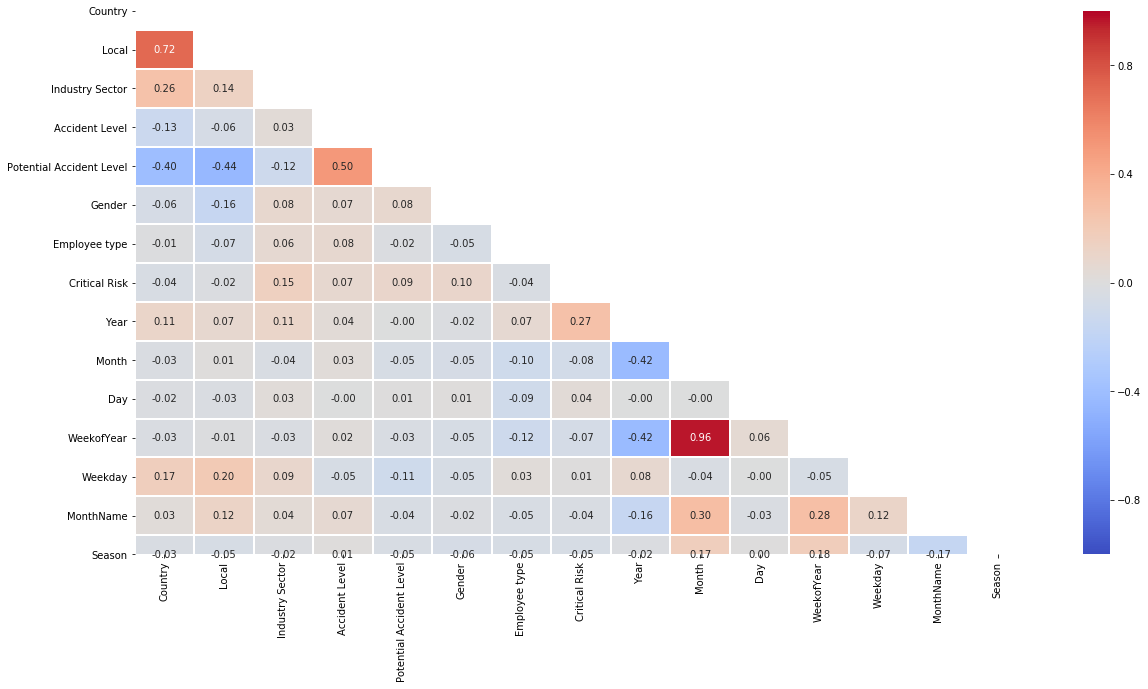

In [25]:
corr = distplot_df.corr()
matrix = np.triu(distplot_df.corr())
plt.figure(figsize= (20,10))
sns.heatmap(corr, annot = True, fmt='.2f',cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=1, linecolor = 'white',mask=matrix)
plt.show()

In [26]:
df=distplot_df

In [27]:
df

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Year,Month,Day,WeekofYear,Weekday,MonthName,Season
0,0,0,1,0,3,1,1,20,0,0,0,52,0,4,2
1,1,1,1,0,3,1,0,21,0,0,1,52,2,4,2
2,0,2,1,0,2,1,2,15,0,0,5,0,6,4,2
3,0,3,1,0,0,1,1,16,0,0,7,0,0,4,2
4,0,3,1,3,3,1,1,16,0,0,9,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,3,1,0,2,1,1,16,1,6,3,26,5,5,3
421,0,2,1,0,1,0,0,16,1,6,3,26,5,5,3
422,1,8,0,0,1,1,0,31,1,6,4,26,6,5,3
423,1,4,0,0,1,1,0,6,1,6,5,26,4,5,3


# **Taking Accident Level as target**

In [28]:
from sklearn.model_selection import train_test_split

Y = df['Accident Level']   # Predicted column
X = df.drop(['Accident Level'],axis=1)     # Predictor columns 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [29]:
from sklearn.preprocessing import MinMaxScaler #Using MinMax Scalar to scale the data
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [30]:
def fit_n_print(EnsModel, X_train_scaled, X_test_scaled, y_train, y_test):  # take the model, train data and test data as input
    
    EnsModel.fit(X_train_scaled, y_train)   
    pred = EnsModel.predict(X_test_scaled)    

    TrainAccuracy = EnsModel.score(X_train_scaled, y_train)
    TestAccuracy = EnsModel.score(X_test_scaled, y_test)
    Precision = precision_score(y_test, pred, average=None)
    Recall = recall_score(y_test, pred, average=None)
    #F1 = f1_score(y_test, pred)
    #MCC = matthews_corrcoef(y_test, pred)
    
    return TrainAccuracy, TestAccuracy, Precision, Recall, pred  # return all the metrics along with predictions

In [31]:

from sklearn import svm
SVM =svm.SVC(gamma=0.25, C=1) 
from sklearn.neighbors import KNeighborsClassifier 
KNN = KNeighborsClassifier(n_neighbors=5)
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features='auto')
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([SVM, KNN, dTree, rfcl, lgb], ['SVM', 'KNN', 'Decision Tree',
                                                   'Random Forrest', 'LightGBM']):
    result[name] = fit_n_print(model,X_train_scaled, X_test_scaled, y_train, y_test)  

In [32]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,Train Accuracy,Test Accuracy,Precision,Recall
Model,,,,
SVM,0.744108,0.742188,"[0.7421875, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]"
KNN,0.76431,0.710938,"[0.7583333333333333, 0.0, 0.0, 0.0, 0.0]","[0.9578947368421052, 0.0, 0.0, 0.0, 0.0]"
Decision Tree,0.996633,0.601562,"[0.782608695652174, 0.2, 0.07692307692307693, ...","[0.7578947368421053, 0.25, 0.1111111111111111,..."
Random Forrest,0.996633,0.742188,"[0.7768595041322314, 0.0, 0.5, 0.0, 0.0]","[0.9894736842105263, 0.0, 0.1111111111111111, ..."
LightGBM,0.996633,0.757812,"[0.8333333333333334, 0.4, 0.2857142857142857, ...","[0.9473684210526315, 0.16666666666666666, 0.22..."


# Taking Potential Accident Level as target

In [33]:
index_names = df[ df['Potential Accident Level'] == 5 ].index 


In [34]:
print(index_names)

Int64Index([307], dtype='int64')


In [35]:
df.iloc[307]

Country                      0
Local                        2
Industry Sector              1
Accident Level               4
Potential Accident Level     5
Gender                       1
Employee type                1
Critical Risk               32
Year                         1
Month                        0
Day                         24
WeekofYear                   3
Weekday                      6
MonthName                    4
Season                       2
Name: 307, dtype: int64

In [36]:
df.drop(index_names, inplace = True) 

In [37]:
df

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Year,Month,Day,WeekofYear,Weekday,MonthName,Season
0,0,0,1,0,3,1,1,20,0,0,0,52,0,4,2
1,1,1,1,0,3,1,0,21,0,0,1,52,2,4,2
2,0,2,1,0,2,1,2,15,0,0,5,0,6,4,2
3,0,3,1,0,0,1,1,16,0,0,7,0,0,4,2
4,0,3,1,3,3,1,1,16,0,0,9,0,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,3,1,0,2,1,1,16,1,6,3,26,5,5,3
421,0,2,1,0,1,0,0,16,1,6,3,26,5,5,3
422,1,8,0,0,1,1,0,31,1,6,4,26,6,5,3
423,1,4,0,0,1,1,0,6,1,6,5,26,4,5,3


In [38]:
Y = df['Potential Accident Level']   # Predicted column
X = df.drop(['Potential Accident Level'],axis=1)     # Predictor columns 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

In [39]:
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

In [40]:
result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([SVM, KNN, dTree, rfcl, lgb], ['SVM', 'KNN', 'Decision Tree',
                                                   'Random Forrest', 'LightGBM']):
    result[name] = fit_n_print(model,X_train_scaled, X_test_scaled, y_train, y_test)  

In [41]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,Train Accuracy,Test Accuracy,Precision,Recall
Model,,,,
SVM,0.543919,0.46875,"[0.6666666666666666, 0.5294117647058824, 0.346...","[0.6666666666666666, 0.3103448275862069, 0.281..."
KNN,0.601351,0.382812,"[0.5555555555555556, 0.34375, 0.29411764705882...","[0.6666666666666666, 0.3793103448275862, 0.312..."
Decision Tree,0.996622,0.421875,"[0.5, 0.375, 0.36363636363636365, 0.4883720930...","[0.5333333333333333, 0.3103448275862069, 0.375..."
Random Forrest,0.996622,0.453125,"[0.6428571428571429, 0.4444444444444444, 0.260...","[0.6, 0.41379310344827586, 0.1875, 0.627906976..."
LightGBM,0.966216,0.46875,"[0.8333333333333334, 0.5, 0.28125, 0.509803921...","[0.6666666666666666, 0.41379310344827586, 0.28..."


# PCA

In [42]:
from scipy.stats import zscore  

In [43]:
X_PCA = df.drop(['Accident Level'],axis=1)
X_scaled_pca = X_PCA.apply(zscore)

In [44]:
X_scaled_pca.shape

(424, 14)

In [45]:
covMatrix = np.cov(X_scaled_pca,rowvar=False)
print(covMatrix.round(2))

[[ 1.    0.72  0.26 -0.4  -0.06 -0.01 -0.04  0.11 -0.03 -0.02 -0.03  0.17
   0.03 -0.03]
 [ 0.72  1.    0.14 -0.44 -0.16 -0.07 -0.02  0.07  0.01 -0.03 -0.01  0.21
   0.12 -0.05]
 [ 0.26  0.14  1.   -0.12  0.08  0.06  0.15  0.11 -0.04  0.03 -0.03  0.09
   0.04 -0.02]
 [-0.4  -0.44 -0.12  1.    0.08 -0.03  0.08 -0.01 -0.04 -0.   -0.03 -0.12
  -0.04 -0.05]
 [-0.06 -0.16  0.08  0.08  1.   -0.05  0.1  -0.02 -0.05  0.01 -0.05 -0.05
  -0.02 -0.06]
 [-0.01 -0.07  0.06 -0.03 -0.05  1.   -0.04  0.07 -0.1  -0.1  -0.11  0.03
  -0.05 -0.05]
 [-0.04 -0.02  0.15  0.08  0.1  -0.04  1.    0.27 -0.08  0.03 -0.06 -0.
  -0.03 -0.05]
 [ 0.11  0.07  0.11 -0.01 -0.02  0.07  0.27  1.   -0.42 -0.01 -0.42  0.07
  -0.16 -0.02]
 [-0.03  0.01 -0.04 -0.04 -0.05 -0.1  -0.08 -0.42  1.    0.    0.97 -0.03
   0.3   0.17]
 [-0.02 -0.03  0.03 -0.    0.01 -0.1   0.03 -0.01  0.    1.    0.06 -0.01
  -0.03  0.  ]
 [-0.03 -0.01 -0.03 -0.03 -0.05 -0.11 -0.06 -0.42  0.97  0.06  1.   -0.05
   0.28  0.18]
 [ 0.17  0.21  0.09 -0.

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit(X_scaled_pca)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
print(pca.explained_variance_.round(2))

[2.49 2.26 1.28 1.21 1.07 0.99 0.95 0.88 0.75 0.69 0.63 0.55 0.25 0.03]


In [48]:
var_ratio = pca.explained_variance_ratio_.round(3)
print(var_ratio) # Percentage of variation explained by each eigen Vector

[0.177 0.161 0.091 0.086 0.076 0.071 0.068 0.063 0.054 0.049 0.045 0.039
 0.018 0.002]


In [49]:
from matplotlib import pyplot as plt

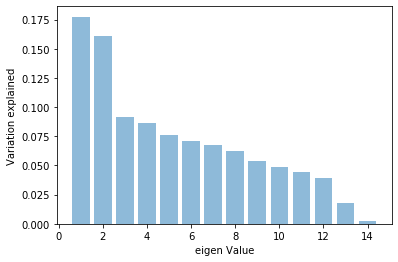

In [50]:
plt.bar(list(range(1,15)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

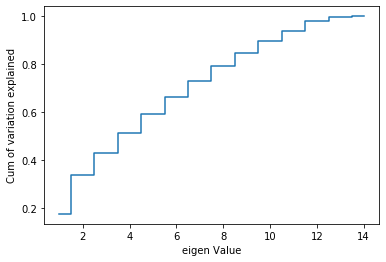

In [51]:
plt.step(list(range(1,15)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

# NLP - Taking only Description as X and Accident Level as Y

In [52]:
df=pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Description'].values, df['Accident Level'].values, 
    test_size=0.15, random_state=0)
print('Training utterances: {}'.format(X_train.shape[0]))
print('Validation utterances: {}'.format(X_test.shape[0]))

Training utterances: 361
Validation utterances: 64


In [54]:
X_train[0]

'Being 9:40 a.m. The driver of the AEQ-819 plate dump truck (35 Ton) was heading to the loading area Nv.1850, OB5, Tj 007, Bp.105, parking and proceeding with the ore loading with the scoop (11 ydrs) , at that moment, lift the first scoop towards the hopper and a large bank falls, causing the tipper to shake violently and the operator to be hit with the gear lever, communicate with the supervisor and evacuated to the medical center .'

In [55]:
y_train[0]

'IV'

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [58]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
X_train, X_test

(<361x3165 sparse matrix of type '<class 'numpy.float64'>'
 	with 15934 stored elements in Compressed Sparse Row format>,
 <64x3165 sparse matrix of type '<class 'numpy.float64'>'
 	with 2433 stored elements in Compressed Sparse Row format>)

In [59]:
from sklearn.feature_selection import SelectKBest, chi2

ch2 = SelectKBest(chi2, k=2000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)

X_train, X_test

(<361x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 13408 stored elements in Compressed Sparse Row format>,
 <64x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 2054 stored elements in Compressed Sparse Row format>)

In [60]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbsScaler=MaxAbsScaler()
X_train_scaled=MaxAbsScaler.fit_transform(X_train)
X_test_scaled=MaxAbsScaler.transform(X_test)


In [61]:
result = {}   # Create an empty dictionary to later use to store metrics of each of the models

# putting all models in a for loop and appending the results of each of the models to the 'result' dictionary
for model, name  in zip([SVM, KNN, dTree, rfcl, lgb], ['SVM', 'KNN', 'Decision Tree',
                                                   'Random Forrest', 'LightGBM']):
    result[name] = fit_n_print(model,X_train_scaled, X_test_scaled, y_train, y_test)  

In [62]:
result1 = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall'],
                      index= result.keys())   # use the model names as index

result1.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result1 

,Train Accuracy,Test Accuracy,Precision,Recall
Model,,,,
SVM,0.99169,0.765625,"[0.7777777777777778, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]"
KNN,0.739612,0.765625,"[0.765625, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]"
Decision Tree,0.99723,0.65625,"[0.7777777777777778, 0.0, 0.0, 0.0, 0.0]","[0.8571428571428571, 0.0, 0.0, 0.0, 0.0]"
Random Forrest,0.99723,0.765625,"[0.7777777777777778, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]"
LightGBM,0.99723,0.78125,"[0.8032786885245902, 1.0, 0.0, 0.0, 0.0]","[1.0, 0.16666666666666666, 0.0, 0.0, 0.0]"


In [64]:
import pickle
filename = 'AccidentClassifier'
pickle.dump(rfcl, open(filename, 'wb'))